# **ATIVIDADE PRÁTICA 1 - FELIPE DA COSTA MARQUES**
Matrícula: 20211205000160



In [ ]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

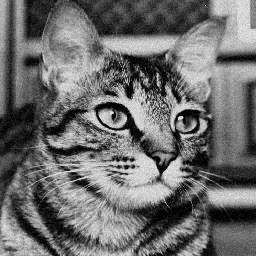

In [ ]:
cat = np.array(cv2.imread('/content/drive/MyDrive/PDI/cat.png',0), dtype='f')
cv2_imshow(cat)

In [ ]:
m = 3
n = 3
a = int((m-1)/2)
b = int((n-1)/2)

boxKernel = np.ones((m,n))
boxKernel /= boxKernel.sum()
print(boxKernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


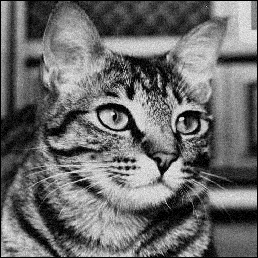

(258, 258)


In [ ]:
M = cat.shape[0]
N = cat.shape[1]
catPadded = np.zeros((int(M + 2*a), int(N + 2*b)))
catPadded[a:a + M, b:b + N] = cat

cv2_imshow(catPadded)
print(catPadded.shape)

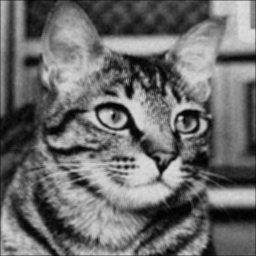

In [ ]:
catSmooth = np.copy(catPadded)
for i in range(a,a+M):
  for j in range(b,b+N):
    vizinhanca = catPadded[i-a:i+a+1,j-b:j+b+1]
    catSmooth[i,j] = np.sum(vizinhanca * boxKernel)

catSmooth = catSmooth[a:a+M, b:b+N]
cv2_imshow(catSmooth)

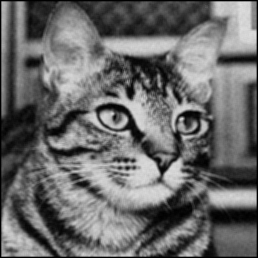

In [ ]:
kernelLaplaciano = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]], dtype='f')

catSmoothPadded = np.zeros((M+2*a, N+2*b))
catSmoothPadded[a:a+M, b:b+N] = catSmooth
cv2_imshow(catSmoothPadded)

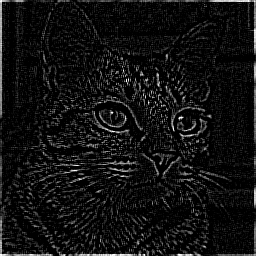

In [ ]:
catLaplaciano = np.copy(catSmoothPadded)
for i in range(a,a+M):
  for j in range(b,b+N):
    vizinhanca = catSmoothPadded[i-1:i+1+1,j-1:j+1+1]
    catLaplaciano[i,j] = np.sum(vizinhanca * kernelLaplaciano)

catLaplaciano = catLaplaciano[a:a+M, b:b+N]
cv2_imshow(catLaplaciano)

In [ ]:
catFinal = catSmooth + 0.2*catLaplaciano
print(" -- COMPARAÇÃO IMAGEM FINAL E INICIAL -- \n")
cv2_imshow(np.hstack((cat, catFinal)))

NameError: ignored